In [143]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sys

In [144]:
DF=pd.read_csv('toefl.csv',sep=',')

In [145]:
DF.shape

(100, 5)

In [146]:
DF.index

RangeIndex(start=0, stop=100, step=1)

In [147]:
DF['gender']=DF['gender'].astype('category')

In [148]:
DF['gender'].cat.categories

Index(['FEMALE', 'MALE'], dtype='object')

In [149]:
DF['gender'].cat.codes

0     0
1     0
2     1
3     0
4     1
     ..
95    0
96    1
97    1
98    0
99    1
Length: 100, dtype: int8

In [150]:
DF['gnd']=DF['gender'].cat.codes

In [151]:
DF['grade']=np.round(((DF['listen']+DF['grammar']+DF['reading'])/3)*10,1)

In [152]:
DF

,id,gender,listen,grammar,reading,gnd,grade
0,1,FEMALE,40,50,56,0,486.7
1,2,FEMALE,33,44,46,0,410.0
2,3,MALE,39,44,47,1,433.3
3,4,FEMALE,44,55,66,0,550.0
4,5,MALE,43,56,53,1,506.7
...,...,...,...,...,...,...,...
95,96,FEMALE,43,48,56,0,490.0
96,97,MALE,50,54,60,1,546.7
97,98,MALE,55,50,67,1,573.3
98,99,FEMALE,53,61,66,0,600.0


In [153]:
DF['grade'].describe()

count    100.000000
mean     504.766000
std       63.270919
min      350.000000
25%      462.475000
50%      498.350000
75%      544.150000
max      646.700000
Name: grade, dtype: float64

In [154]:
DF2=pd.DataFrame(DF['grade'].describe()[['mean','std','min','max']])
DF2=DF2.T

In [155]:
DF2['var']=DF['grade'].var()
DF2=pd.DataFrame(DF2,columns=['mean','var','std','min','max'])
DF2

,mean,var,std,min,max
grade,504.766,4003.209135,63.270919,350.0,646.7


In [156]:
DF['grade'].groupby(DF['gender']).describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
FEMALE,59.0,501.130508,64.027468,350.0,460.0,490.0,538.35,640.0
MALE,41.0,509.997561,62.578712,350.0,466.7,506.7,550.00,646.7


In [157]:
DF3=pd.DataFrame(DF['grade'].groupby(DF['gender']).describe()[['mean','std','min','max']])

In [158]:
DF3['var']=DF['grade'].groupby(DF['gender']).var()

In [159]:
DF3=pd.DataFrame(DF3,columns=['mean','var','std','min','max'])
DF3

,mean,var,std,min,max
gender,,,,,
FEMALE,501.130508,4099.516639,64.027468,350.0,640.0
MALE,509.997561,3916.095244,62.578712,350.0,646.7


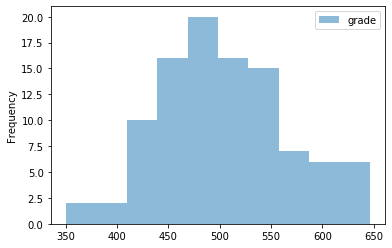

In [160]:
DF.plot(y='grade',kind='hist',alpha=0.5)

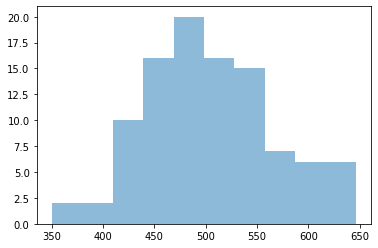

In [161]:
plt.hist(DF.grade,alpha=0.5);

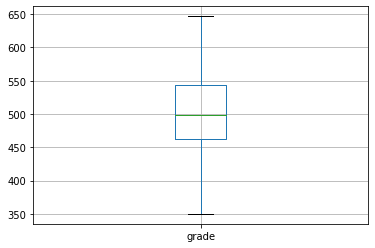

In [162]:
DF.plot(y='grade',kind='box',grid=True);

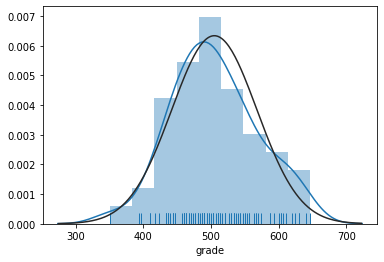

In [163]:
sns.distplot(DF.grade,rug=True,fit=stats.norm);

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C48E559488>,
      dtype=object)

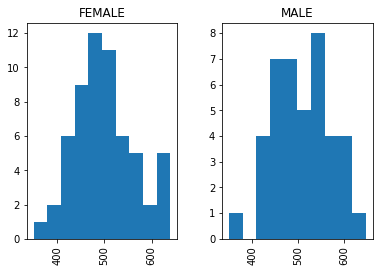

In [164]:
DF.hist(column='grade',by='gender')

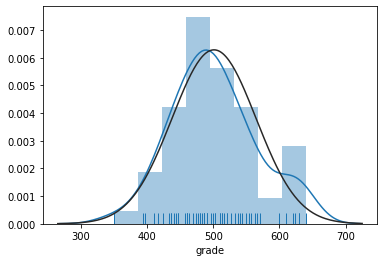

In [165]:
sns.distplot(DF.grade[DF.gender=='FEMALE'],rug=True,fit=stats.norm);


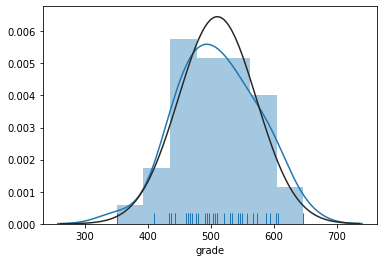

In [166]:
sns.distplot(DF.grade[DF.gender=='MALE'],rug=True,fit=stats.norm);

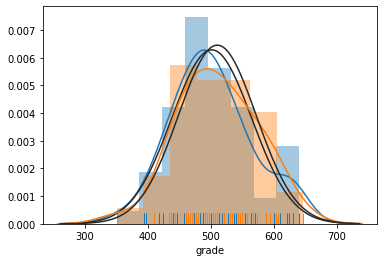

In [167]:
sns.distplot(DF.grade[DF.gender=='FEMALE'],rug=True,fit=stats.norm);
sns.distplot(DF.grade[DF.gender=='MALE'],rug=True,fit=stats.norm);

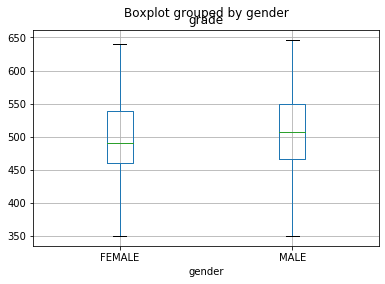

In [168]:
DF.boxplot(column='grade',by='gender')

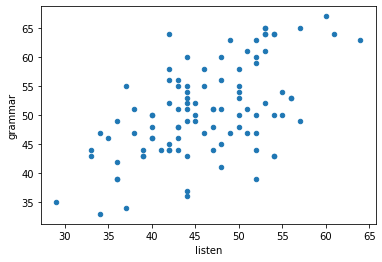

In [169]:
DF.plot(x='listen',y='grammar',kind='scatter')

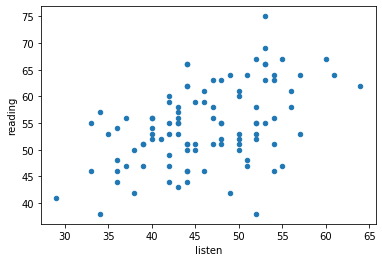

In [170]:
DF.plot(x='listen',y='reading',kind='scatter')

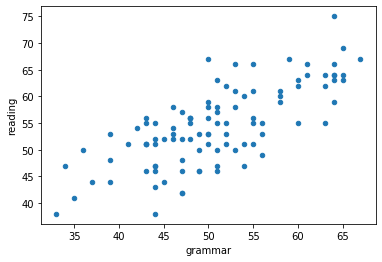

In [171]:
DF.plot(x='grammar',y='reading',kind='scatter')

In [172]:
DF['test']=np.where(DF.grade>=500,'응시료,졸업시험 면제',np.where(DF.grade>=450,'응시료 면제',np.where(DF.grade>=400,'지원없음','특강수강')))

In [173]:
DF['test']=DF['test'].astype('category')

In [174]:
DF['test'].cat.categories

Index(['응시료 면제', '응시료,졸업시험 면제', '지원없음', '특강수강'], dtype='object')

In [175]:
DF['test'].cat.reorder_categories(['응시료,졸업시험 면제','응시료 면제', '지원없음', '특강수강'],inplace=True)

In [176]:
DF['test'].cat.categories

Index(['응시료,졸업시험 면제', '응시료 면제', '지원없음', '특강수강'], dtype='object')

In [177]:
DF['test']=(DF['test'].cat.codes+1)

In [178]:
DF['test'].head(30)

0     2
1     3
2     3
3     1
4     1
5     1
6     1
7     2
8     1
9     1
10    1
11    2
12    1
13    2
14    3
15    2
16    1
17    1
18    3
19    3
20    1
21    2
22    1
23    2
24    2
25    1
26    3
27    2
28    3
29    1
Name: test, dtype: int8

In [179]:
DF['passing']=np.where((DF.test==1)|(DF.test==2),1,0)

In [180]:
DF['passing']=DF['passing'].astype('category')

In [181]:
DF['passing'].cat.codes

0     1
1     0
2     0
3     1
4     1
     ..
95    1
96    1
97    1
98    1
99    0
Length: 100, dtype: int8

In [182]:
DF.tail(30)

,id,gender,listen,grammar,reading,gnd,grade,test,passing
70,71,MALE,29,35,41,1,350.0,4,0
71,72,FEMALE,51,47,48,0,486.7,2,1
72,73,FEMALE,52,39,53,0,480.0,2,1
73,74,MALE,39,43,51,1,443.3,3,0
74,75,FEMALE,48,51,55,0,513.3,1,1
75,76,FEMALE,43,46,58,0,490.0,2,1
76,77,FEMALE,57,65,64,0,620.0,1,1
77,78,FEMALE,34,33,38,0,350.0,4,0
78,79,FEMALE,36,39,44,0,396.7,4,0
79,80,FEMALE,50,58,61,0,563.3,1,1


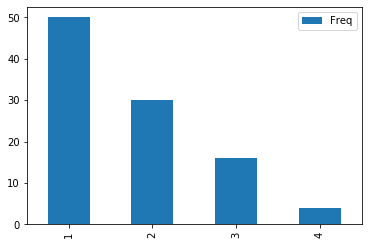

In [183]:
testfreq=DF['test'].value_counts()
testprop=testfreq/sum(testfreq)
testplt=pd.concat([testfreq,testprop],axis=1)
testplt.columns=['Freq','Prop']
testplt
testplt.plot.bar(y='Freq');

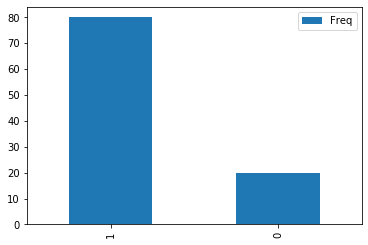

In [184]:
passfreq=DF['passing'].value_counts()
passprop=passfreq/sum(passfreq)
passtbl=pd.concat([passfreq,passprop],axis=1)
passtbl.columns=['Freq','Prop']
passtbl
passtbl.plot.bar(y='Freq');

In [185]:
gndtest=pd.crosstab(index=DF.gender,columns=DF.test,margins=True)
gndpass=pd.crosstab(index=DF.gender,columns=DF.passing,margins=True)
gndtest

test,1,2,3,4,All
gender,,,,,
FEMALE,28,18,10,3,59
MALE,22,12,6,1,41
All,50,30,16,4,100


In [186]:
gndpass

passing,0,1,All
gender,,,
FEMALE,13,46,59
MALE,7,34,41
All,20,80,100


In [187]:
gndtest/gndtest.loc['All','All']

test,1,2,3,4,All
gender,,,,,
FEMALE,0.28,0.18,0.10,0.03,0.59
MALE,0.22,0.12,0.06,0.01,0.41
All,0.50,0.30,0.16,0.04,1.00


In [188]:
gndpass/gndpass.loc['All','All']

passing,0,1,All
gender,,,
FEMALE,0.13,0.46,0.59
MALE,0.07,0.34,0.41
All,0.20,0.80,1.00
